In [1]:
import dash
# import dash_auth
# from users import USERNAME_PASSWORD_PAIRS
from dash import dcc
from dash import html
import plotly
import dash_bootstrap_components as dbc
# import dash_daq as dq
from jupyter_dash import JupyterDash
from dash.exceptions import PreventUpdate
from dash import Dash
import pandas as pd  
import joblib
import base64, io, os
from dash import  dash_table
import dash
import pandas as pd
from dash import dash_table
import pickle
from dash.dependencies import Input, Output, State, ALL, MATCH
import json
# from functools import reduce
from dash import Input, Output, State, html
from tqdm.notebook import trange, tqdm
import pickle
import numpy as np
import pandas as pd
# from cryptography.fernet import Fernet
import json
import io, base64, os
import pandas as pd
import datetime
import time
import re
import plotly.express as px
import plotly.graph_objects as go
from dash_canvas.utils import array_to_data_url
import dash_mantine_components as dmc

import geopandas
import tifffile as tiff
import cv2
import matplotlib; matplotlib.rcParams['figure.dpi']=100
import matplotlib.pyplot as plt
import pickle
import numpy as np
from pathpretrain.utils import generate_tissue_mask
import scipy.ndimage as ndimage
from skimage.util import compare_images
from skimage.measure import regionprops_table
from skimage import exposure
import tempfile
import matplotlib.image as mpimg
from skimage import data, draw
from io import BytesIO
import copy
from matplotlib.colors import Normalize as Colors_Normalize
# from scipy import ndimage
from skimage.filters import threshold_otsu
from skimage import morphology as morph
from scipy.ndimage import label as scilabel
from scipy.ndimage.morphology import binary_fill_holes as fill_holes
from skimage import measure
import imageio

import numpy as np
from scipy.ndimage import label, find_objects
from skimage.morphology import remove_small_objects#binary_fill_holes
from skimage import morphology


In [3]:
def calculate_mean(arr, x, y):
    # Define the neighboring indices
    neighbors = [(i, j) for i in range(x-1, x+2) for j in range(y-1, y+2) if (i, j) != (x, y)]
    values = []
    
    # Iterate through the neighbors and collect their values
    for i, j in neighbors:
        if 0 <= i < arr.shape[0] and 0 <= j < arr.shape[1]:
            values.append(arr[i, j])

    # Replace NaN values in the list with 0 for mean calculation
    values = [0 if np.isnan(v) else v for v in values]
    
    # Calculate the mean, considering NaNs as 0
    return np.mean(values) if values else np.nan

def replace_nan_with_mean(arr):
    # First create a copy to not alter the original array
    new_arr = np.copy(arr)

    # Boolean array indicating where the NaNs are located
    nan_map = np.isnan(new_arr)

    # While there are NaNs in the array, keep replacing them
    while np.any(nan_map):
        # Iterate over the array
        for x in range(new_arr.shape[0]):
            for y in range(new_arr.shape[1]):
                # Replace NaN with the mean of its neighbors
                if nan_map[x, y]:
                    new_arr[x, y] = calculate_mean(new_arr, x, y)
        
        # Update the NaN map for the next iteration
        nan_map = np.isnan(new_arr)

    return new_arr


In [107]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_0/new_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)

In [108]:
image = replace_nan_with_mean(metal_data['metals']['All'])

In [109]:
imageio.imwrite('tissue_mask_test.png', np.log(image+5))

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


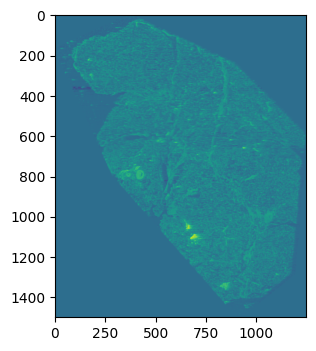

In [110]:
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)

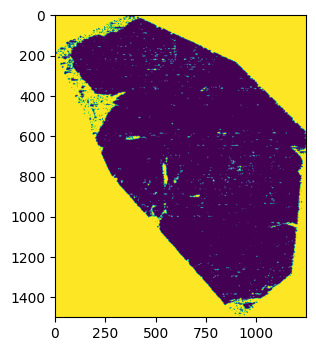

In [111]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = 93
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


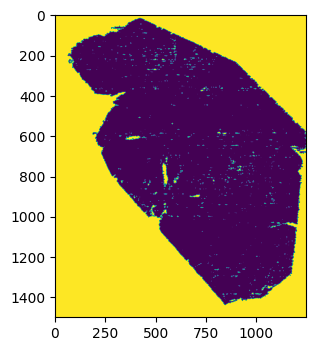

In [112]:
test_1 = morphology.remove_small_holes(tissue_mask, 50000)
plt.imshow(test_1)

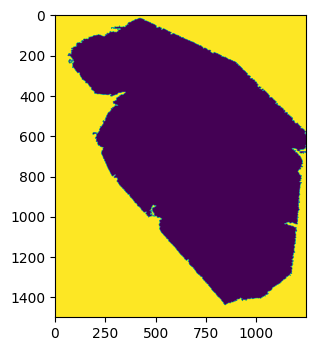

In [113]:
test_2 = morphology.remove_small_objects(test_1, 50000)
plt.imshow(test_2)

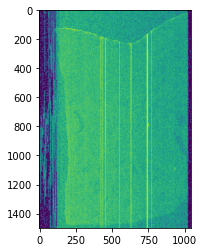

In [4]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app/data/colon/new_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
image = replace_nan_with_mean(metal_data['metals']['All'])
imageio.imwrite('tissue_mask_test.png', np.log(image+5))
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)


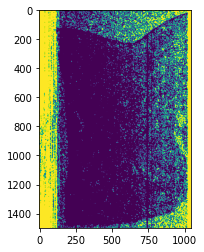

In [38]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = 145
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)
plt.show()


/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


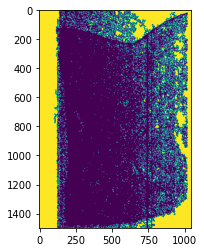

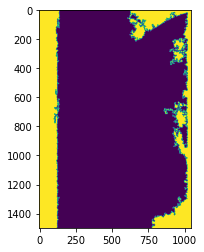

In [39]:

test_1 = morphology.remove_small_holes(tissue_mask, 10000)
plt.imshow(test_1)
plt.show()
test_2 = morphology.remove_small_objects(test_1, 50000)
plt.imshow(test_2)
plt.show()

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


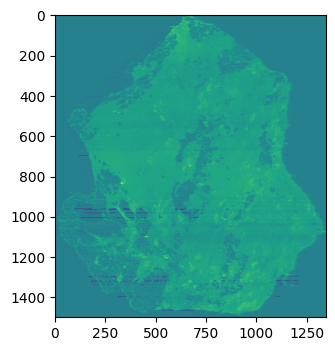

In [117]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_2/new_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
image = replace_nan_with_mean(metal_data['metals']['All'])
imageio.imwrite('tissue_mask_test.png', np.log(image+5))
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)


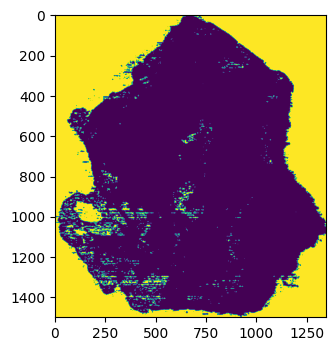

In [118]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = 113
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)
plt.show()


/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


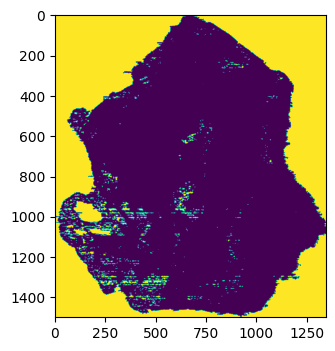

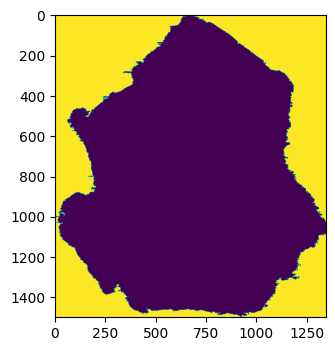

In [119]:

test_1 = morphology.remove_small_holes(tissue_mask, 10000)
plt.imshow(test_1)
plt.show()
test_2 = morphology.remove_small_objects(test_1, 50000)
plt.imshow(test_2)
plt.show()

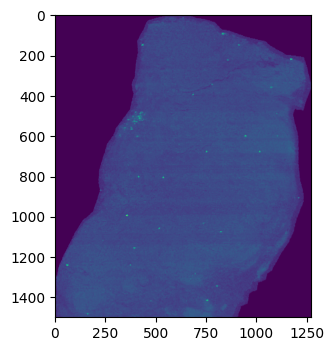

In [120]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app/data/colon/new_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
image = replace_nan_with_mean(metal_data['metals']['All'])
imageio.imwrite('tissue_mask_test.png', np.log(image+5))
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)


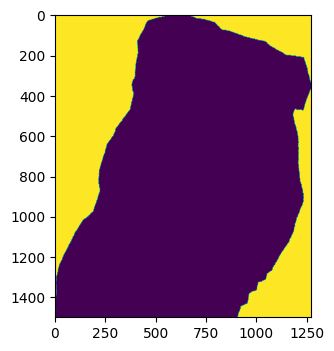

In [121]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = 20
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)
plt.show()


/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


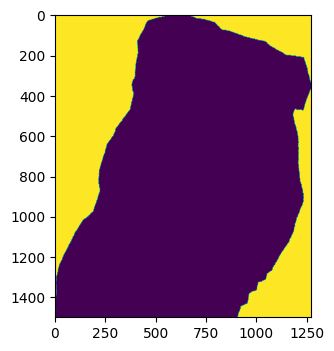

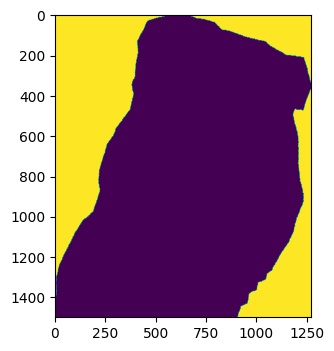

In [122]:

test_1 = morphology.remove_small_holes(tissue_mask, 10000)
plt.imshow(test_1)
plt.show()
test_2 = morphology.remove_small_objects(test_1, 50000)
plt.imshow(test_2)
plt.show()

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


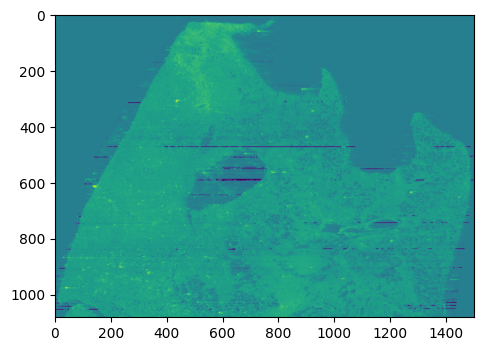

In [123]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_4/new_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
image = replace_nan_with_mean(metal_data['metals']['All'])
imageio.imwrite('tissue_mask_test.png', np.log(image+5))
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)


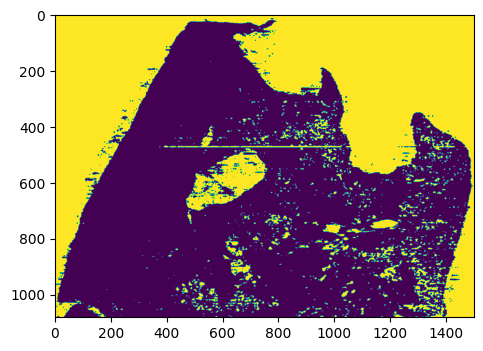

In [124]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = 120
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)
plt.show()


/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


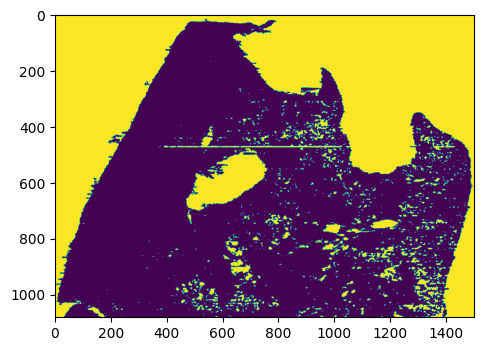

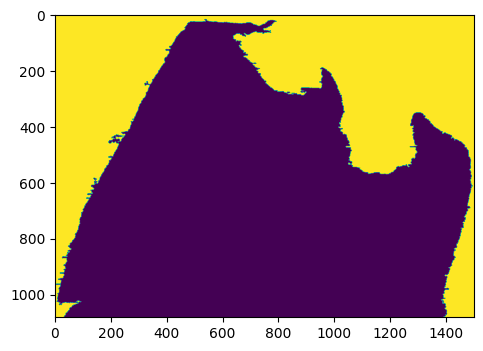

In [125]:

test_1 = morphology.remove_small_holes(tissue_mask, 10000)
plt.imshow(test_1)
plt.show()
test_2 = morphology.remove_small_objects(test_1, 50000)
plt.imshow(test_2)
plt.show()

In [126]:
test_2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [127]:
measure.find_contours(test_2)

[array([[1080. , 1387.5],
        [1079.5, 1388. ],
        [1079. , 1388.5],
        ...,
        [1078.5,   32. ],
        [1079. ,   31.5],
        [1080. ,   31.5]])]

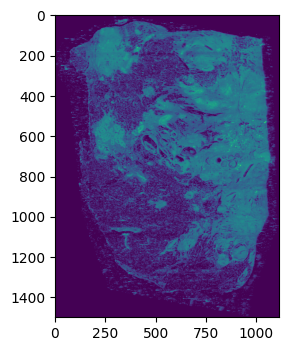

In [142]:
image = cv2.imread('tissue_mask_test.png', 0)
plt.imshow(image)


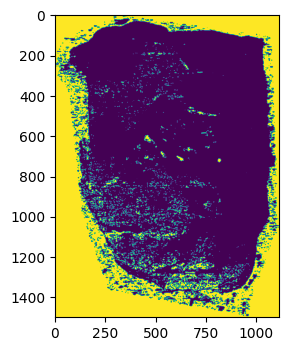

In [140]:
threshold = 10
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = threshold
_, tissue_mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1),np.uint8)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_OPEN, kernel)
tissue_mask = cv2.morphologyEx(tissue_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(tissue_mask)
plt.show()


In [141]:

test_1 = morphology.remove_small_holes(tissue_mask, 10000)
# plt.imshow(test_1)
# plt.show()
final_mask = morphology.remove_small_objects(test_1, 50000)

final_mask = ~final_mask

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.
